In [292]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [293]:
#read data
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [294]:
# info() gives you structural information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [295]:
# check the first five rows of data
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [296]:
# count the number of the churned user and not churned user
churn_counts = df['Churned'].value_counts()
print(churn_counts)

Churned
0    754
1    246
Name: count, dtype: int64


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/3914115572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


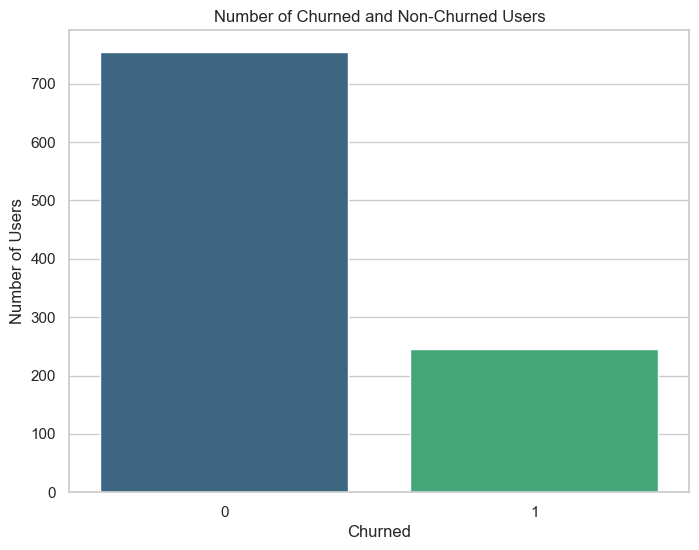

In [297]:
# create the barplot for the number of retained users and churn users
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Number of Churned and Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Number of Users')
plt.show()

Text(0, 0.5, 'Percentage Of Churned')

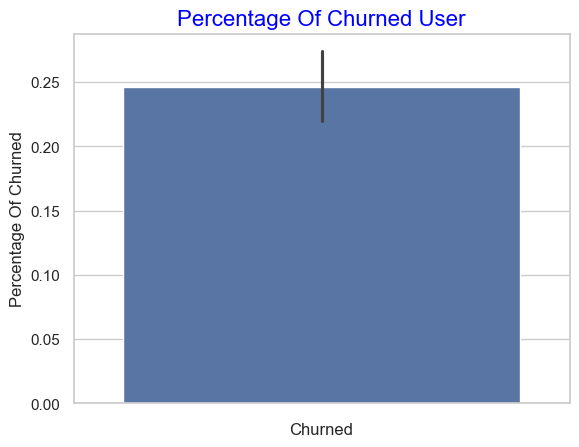

In [298]:
#create barplot for the percentage of Churned User
sns.barplot( y='Churned', data=df)
plt.title("Percentage Of Churned User", fontsize=16, color='blue')
plt.xlabel('Churned')
plt.ylabel('Percentage Of Churned')

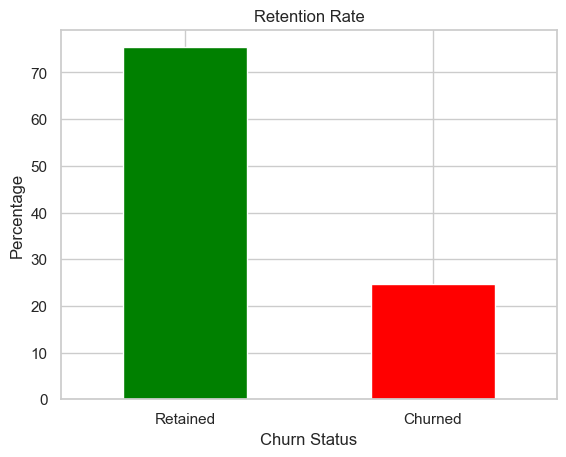

In [299]:
# calculate the retention rate and churned rate
retention_rate = df['Churned'].value_counts(normalize=True) * 100

# create the boxplot of the retention rate
fig, ax = plt.subplots()
retention_rate.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_title('Retention Rate')
ax.set_xlabel('Churn Status')
ax.set_ylabel('Percentage')
ax.set_xticklabels(['Retained', 'Churned'], rotation=0)

plt.show()


In [300]:
# calculate the total user and retained user by age with every 10 years
bins = [17, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39','40-49','50-59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']].head(10))

age_retention = df.groupby('Age_Group').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

age_retention['retention_rate'] = (age_retention['retained_users'] / age_retention['total_users']) * 100

print(age_retention)

   Age Age_Group
0   56     50-59
1   69       60+
2   46     40-49
3   32     30-39
4   60     50-59
5   25     18-29
6   38     30-39
7   56     50-59
8   36     30-39
9   40     30-39
           total_users  retained_users  retention_rate
Age_Group                                             
18-29              235             171       72.765957
30-39              174             122       70.114943
40-49              214             171       79.906542
50-59              178             141       79.213483
60+                199             149       74.874372


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/679683537.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby('Age_Group').agg(


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/2217679567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')


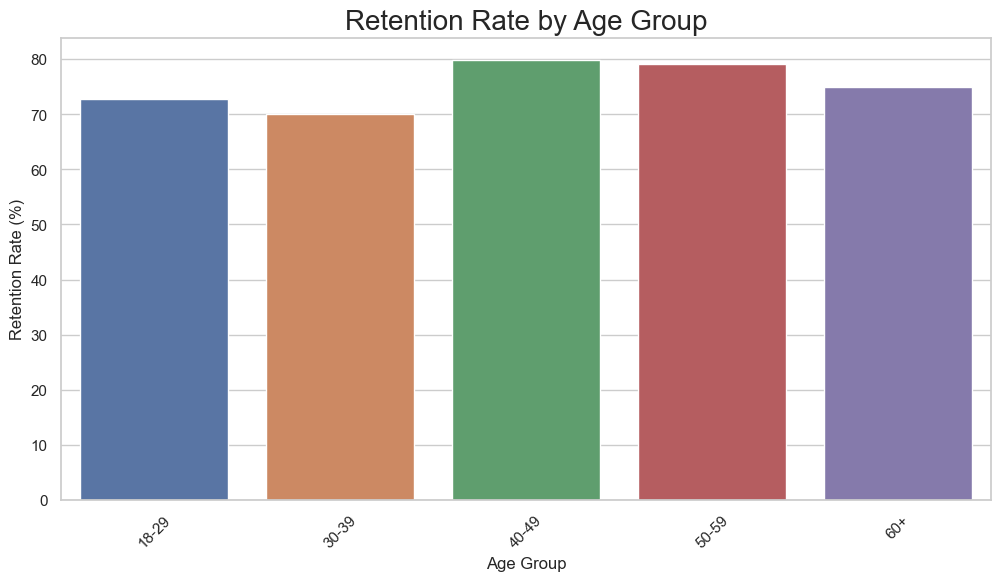

In [301]:
# create barplot for the retention rate by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=age_retention.index, y=age_retention['retention_rate'], palette='deep')
plt.title('Retention Rate by Age Group', fontsize = 20)
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [302]:
# calculate the average of the monthly payment from the data set.
avg_payments = df['Monthly_Payment'].mean()
print(avg_payments)

14.580000000000002


In [303]:
#Calculate the retention rate for 18-29 and 30-39
retention_rate_18_29 = age_retention.loc['18-29', 'retention_rate']
retention_rate_30_39 = age_retention.loc['30-39', 'retention_rate']
#Calculate the average retention rate for 40-70
retention_rate_40_70_avg = (age_retention.loc['40-49', 'retention_rate'] + age_retention.loc['50-59', 'retention_rate'] + age_retention.loc['60+', 'retention_rate']) / 3

#calculate the increase of the retention rate for 18-29 and 30-39
increase_in_retention_rate_18_29 = retention_rate_40_70_avg - retention_rate_18_29
increase_in_retention_rate_30_39 = retention_rate_40_70_avg - retention_rate_30_39

#Calculate the total user for 18-29 and 30-39
total_users_18_29 = age_retention.loc['18-29', 'total_users'] 
total_users_30_39 = age_retention.loc['30-39', 'total_users'] 

#Calculate the estimated increase in retained user
increase_in_retained_users = increase_in_retention_rate_18_29 / 100 * total_users_18_29 + increase_in_retention_rate_30_39 / 100 * total_users_30_39

#Calculate the estimated increase in retention rate for 18-39
increase_in_retention_rate_18_39 = increase_in_retained_users / (total_users_18_29 + total_users_30_39)

#Calculate the estimated increase of monthly revenue
est_rev_age = increase_in_retained_users  * avg_payments

print("the estimated increase of the retention rate for 18-29 ", increase_in_retention_rate_18_29)
print("the estimated increase of the retention rate for 30-39 ", increase_in_retention_rate_30_39)
print("the total estimated increase of retained user：", increase_in_retained_users)
print("the estimated increase in retention rate for 18-39",increase_in_retention_rate_18_39)
print("the total estimaeted increase of monthly revenue by age",est_rev_age)


the estimated increase of the retention rate for 18-29  5.232174907004378
the estimated increase of the retention rate for 30-39  7.8831898250772525
the total estimated increase of retained user： 26.01236132709471
the estimated increase in retention rate for 18-39 0.06359990544521933
the total estimaeted increase of monthly revenue by age 379.2602281490409


In [304]:
#Calculate the total number of users and retained users for each device
device_retention = df.groupby('Devices_Used').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

device_retention['retention_rate'] = (device_retention['retained_users'] / device_retention['total_users']) * 100
device_retention.reset_index(inplace=True)

print(device_retention)


  Devices_Used  total_users  retained_users  retention_rate
0       Mobile          408             277       67.892157
1           PC          174             147       84.482759
2           TV          201             157       78.109453
3       Tablet          217             173       79.723502


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/423854655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')


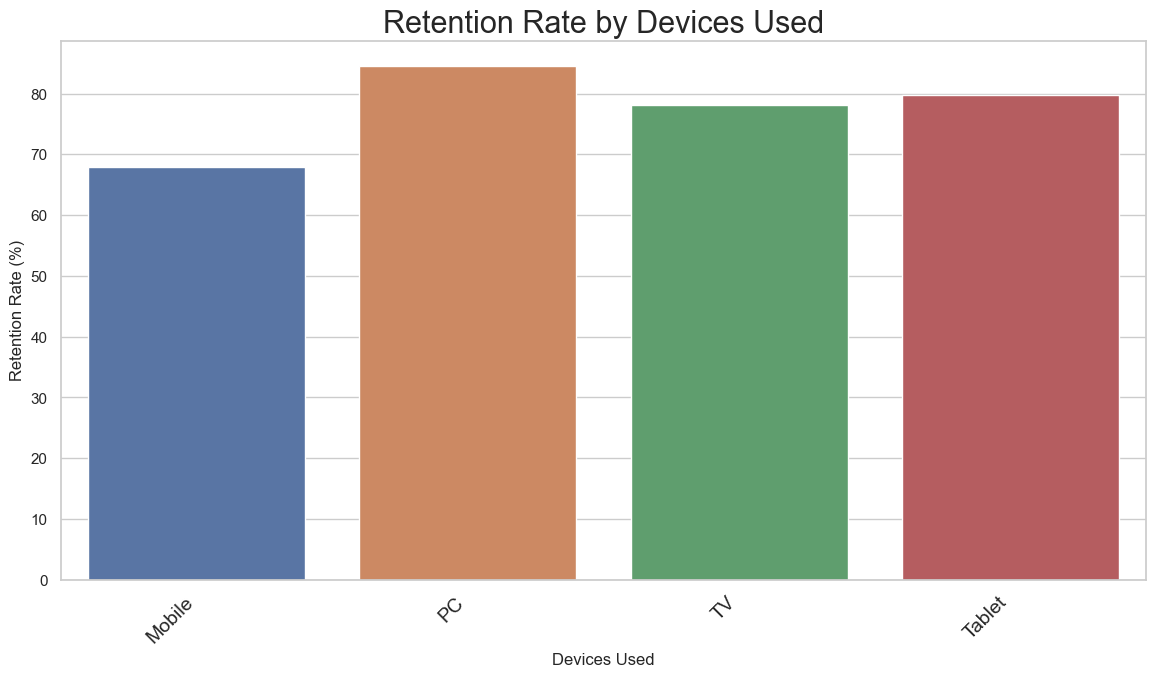

In [305]:
# create the retention rate of each devices used
plt.figure(figsize=(14, 7))
sns.barplot(x='Devices_Used', y='retention_rate', data=device_retention, palette='deep')
plt.title('Retention Rate by Devices Used', fontsize = 22)
plt.xlabel('Devices Used')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right', fontsize= 14) 
plt.show()

Devices_Used
Mobile    131
Tablet     44
TV         44
PC         27
Name: count, dtype: int64


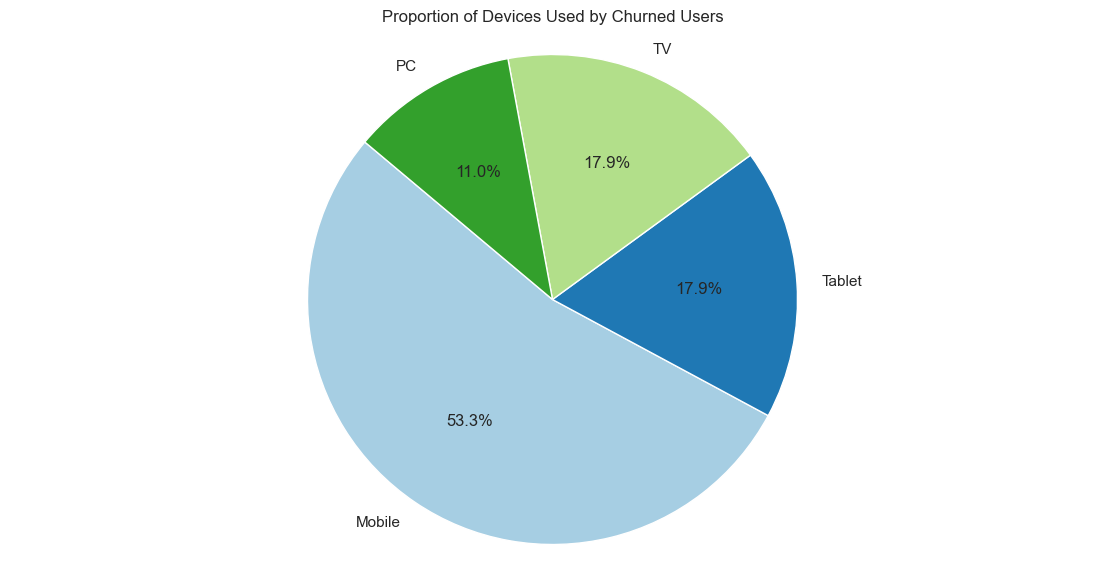

In [306]:
#Count the churned users by each devices used
device_churn_count = churned_users['Devices_Used'].value_counts()

print(device_churn_count)

plt.figure(figsize=(14, 7))
plt.pie(device_churn_count, labels=device_churn_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Devices Used by Churned Users')
plt.axis('equal')  
plt.show()


In [307]:
#Calculate the average retention rate for PC&TV&Tablet
avg_retention_rate_other_devices = device_retention[device_retention['Devices_Used'] != 'Mobile']['retention_rate'].mean()

#Calculate the total retain users for mobile
retained_users_mobile = device_retention[device_retention['Devices_Used'] == 'Mobile']['retained_users'].iloc[0]

#Calculate the total users for mobile
total_users_mobile = device_retention[device_retention['Devices_Used'] == 'Mobile']['total_users'].iloc[0]

#Calculate the estimated increase of the retention rate for mobile user
current_retention_rate_mobile = device_retention[device_retention['Devices_Used'] == 'Mobile']['retention_rate'].iloc[0]
increase_in_retention_rate_mobile = avg_retention_rate_other_devices - current_retention_rate_mobile

#Calculate the estimated increase of the retained user for mobile user
increase_in_retained_users_mobile = (increase_in_retention_rate_mobile / 100) * total_users_mobile

#Calculate the estimated increase of monthly revenue
est_rev_device = increase_in_retained_users_mobile  * avg_payments

print("the estimated increase of retained users by mobile", increase_in_retained_users_mobile)
print("the average retention rate for PC&TV&Tablet ", avg_retention_rate_other_devices)
print("the current retained mobile user", retained_users_mobile)
print("the estimated increase of tetention rate for mobile user", increase_in_retention_rate_mobile)
print("the total estimaeted increase of monthly revenue by device",est_rev_device)


the estimated increase of retained users by mobile 52.549370579171544
the average retention rate for PC&TV&Tablet  80.77190455371851
the current retained mobile user 277
the estimated increase of tetention rate for mobile user 12.879747690973417
the total estimaeted increase of monthly revenue by device 766.1698230443212


In [308]:

#Calculate the total users and retained users by each device used
Genre_retention = df.groupby('Favorite_Genre').agg(
    total_users=('User_ID', 'count'),
    retained_users=('Churned', lambda x: (x == 0).sum())
)

Genre_retention['retention_rate'] = (Genre_retention['retained_users'] / Genre_retention['total_users']) * 100

Genre_retention.reset_index(inplace=True)

print(Genre_retention)

  Favorite_Genre  total_users  retained_users  retention_rate
0         Action          205             156       76.097561
1         Comedy          203             154       75.862069
2    Documentary          188             136       72.340426
3          Drama          212             165       77.830189
4         Sci-Fi          192             143       74.479167


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_7573/2494334278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Favorite_Genre', y='retention_rate', data=Genre_retention, palette='deep')


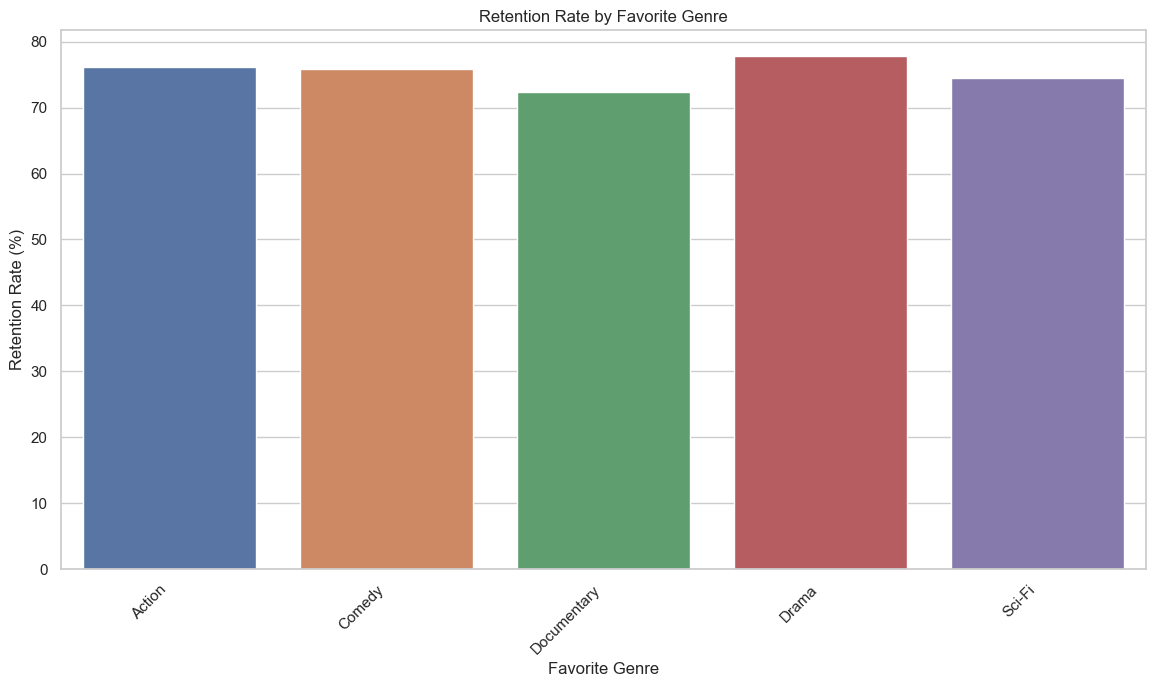

In [309]:
# Create the retention rate by Favorite Genre
plt.figure(figsize=(14, 7))
sns.barplot(x='Favorite_Genre', y='retention_rate', data=Genre_retention, palette='deep')
plt.title('Retention Rate by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [310]:
#Calculate the average retention rate for Action&Comedy&Drama&Sci-Fi
avg_retention_rate_other_genres = Genre_retention[Genre_retention['Favorite_Genre'] != 'Documentary']['retention_rate'].mean()

#Calculate the current total user and retained user by documentary
retained_users_documentary = Genre_retention[Genre_retention['Favorite_Genre'] == 'Documentary']['retained_users'].iloc[0]
total_users_documentary = Genre_retention[Genre_retention['Favorite_Genre'] == 'Documentary']['total_users'].iloc[0]

#Calculate the estimated increase of the retention rate for documentary
current_retention_rate_documentary = Genre_retention[Genre_retention['Favorite_Genre'] == 'Documentary']['retention_rate'].iloc[0]
increase_in_retention_rate_documentary = avg_retention_rate_other_genres - current_retention_rate_documentary

#Calculate the estimated increase retained user by documentary
increase_in_retained_users_documentary = (increase_in_retention_rate_documentary / 100) * total_users_documentary

#Calculate the estimated increase of total monthly revenue by documentary
est_rev_genre = increase_in_retained_users_documentary  * avg_payments



print("the estimated increase of the retained user by documentary", increase_in_retained_users_documentary)
print("the average retention rate for Action&Comedy&Drama&Sci-Fi ", avg_retention_rate_other_genres)
print("the current retained user by documentary", retained_users_documentary)
print("the estimated increase of the retention rate by documentary：", increase_in_retention_rate_documentary)
print("the estimated increase of total monthly revenue by documentary ",est_rev_genre)


the estimated increase of the retained user by documentary 7.006423084908294
the average retention rate for Action&Comedy&Drama&Sci-Fi  76.06724632175974
the current retained user by documentary 136
the estimated increase of the retention rate by documentary： 3.7268207898448367
the estimated increase of total monthly revenue by documentary  102.15364857796294
